In [2]:
print("hello")

hello


2023-04-24 16:15:22.450318: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 16:15:22.993739: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Running nelder_mead...


2023-04-24 16:16:11.487516: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-24 16:16:11.600218: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-24 16:16:11.601033: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-24 16:16:11.602386: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other 

Epoch 1/5
30/30 [==============================] - 1s 5ms/step - loss: 1.9193 - accuracy: 0.4522 - val_loss: 1.1548 - val_accuracy: 0.7000
Epoch 2/5
30/30 [==============================] - 0s 3ms/step - loss: 0.7485 - accuracy: 0.7844 - val_loss: 0.5123 - val_accuracy: 0.8700
Epoch 3/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4309 - accuracy: 0.8811 - val_loss: 0.4993 - val_accuracy: 0.8500
Epoch 4/5
30/30 [==============================] - 0s 3ms/step - loss: 0.3270 - accuracy: 0.9067 - val_loss: 0.3895 - val_accuracy: 0.8900
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2848 - accuracy: 0.9119
Test loss: 0.2848219573497772
Test accuracy: 0.911899983882904


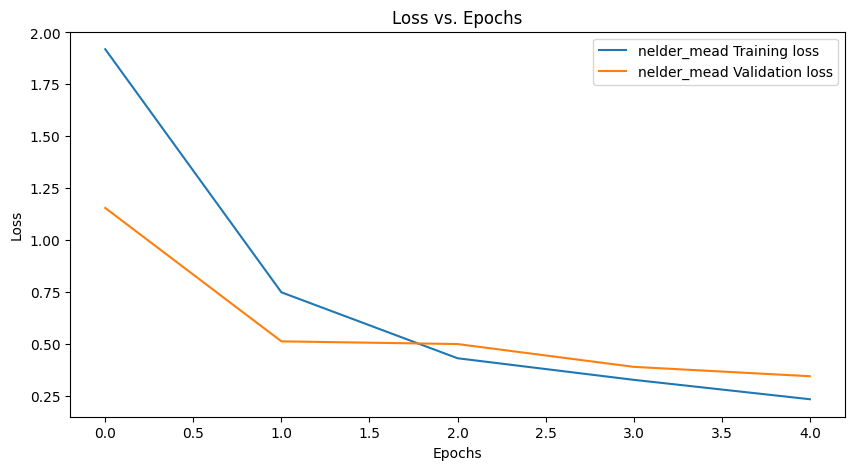

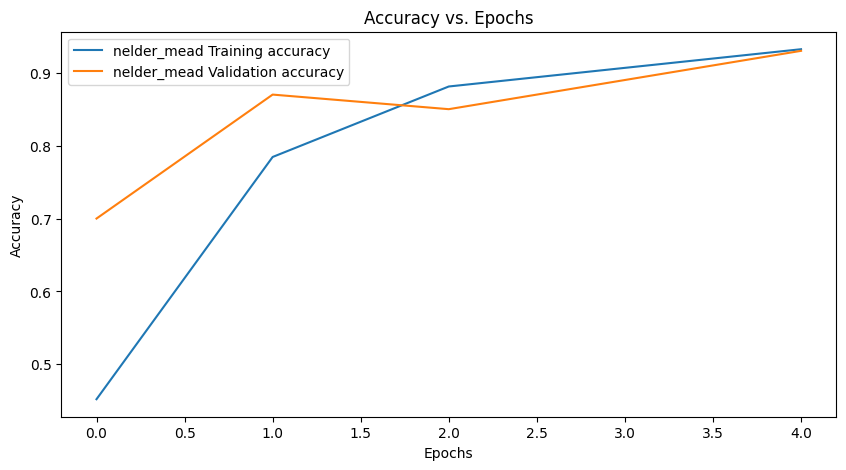

In [1]:
from myMain import DataLoader, MyHyperModel, NelderMeadHyperModel, TunerWrapper, PlotResults

if __name__ == "__main__":
    data_loader = DataLoader(n=1000)
    x_train, y_train, x_test, y_test = data_loader.load_data()

    # algorithms = ["grid_search", "random_search", "nelder_mead"]
    algorithms = ["nelder_mead"]

    results = {}

    for algorithm in algorithms:
        print(f"Running {algorithm}...")

        if algorithm == "nelder_mead":
            hypermodel = NelderMeadHyperModel(num_classes=10)
        else:
            hypermodel = MyHyperModel(num_classes=10)

        tuner_wrapper = TunerWrapper(x_train, y_train, x_test, y_test)

        if algorithm == "grid_search":
            best_model, history = tuner_wrapper.grid_search(hypermodel, "trail#1_1000/grid", "trail1000")
        elif algorithm == "random_search":
            best_model, history = tuner_wrapper.random_search(hypermodel, "trail#1_1000", "random")
        elif algorithm == "nelder_mead":
            best_model, history = tuner_wrapper.nelder_mead_search(hypermodel)

        results[algorithm] = history.history

    # Plot the results
    myplot = PlotResults(results)
    myplot.plot_loss()
    myplot.plot_accuracy()